# COGS209 Project 2 


In [58]:
#Imports
import pandas as pd, numpy as np
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#Load data
data=pd.read_csv('https://www.dropbox.com/scl/fi/eut3hbc6vh94713teclkd/heart.csv?rlkey=24b949anqmwjs4g9zstvdyrv0&st=xb2s3u6m&dl=1')
#Preview data
print(data.shape)
print(data)

(918, 12)
     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0      172       

In [60]:
# preprocess the data by converting the categorical variable into numerical values 
# Import LabelEncoder 
from sklearn.preprocessing import LabelEncoder
# convert categorical data to numerical data 
le = LabelEncoder()
for column in data.columns:
    if data[column].dtype == type(object):
        data[column] = le.fit_transform(data[column])
# display the first 5 rows of the data for validation that the conversion was successful
print(data.head())

   Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0   40    1              1        140          289          0           1   
1   49    0              2        160          180          0           1   
2   37    1              1        130          283          0           2   
3   48    0              0        138          214          0           1   
4   54    1              2        150          195          0           1   

   MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  
0    172               0      0.0         2             0  
1    156               0      1.0         1             1  
2     98               0      0.0         2             0  
3    108               1      1.5         1             1  
4    122               0      0.0         2             0  


In [61]:
# preprocess the data 
# split the data into features and target variable
X_raw = data.drop('HeartDisease', axis = 1)
y = data['HeartDisease']
#standardize the data
X =(X_raw-X_raw.mean(axis=0))/X_raw.std(axis=0) 
print(X)

          Age       Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  \
0   -1.432359  0.515671       0.228907   0.410685     0.824621  -0.551041   
1   -0.478223 -1.937107       1.274364   1.490940    -0.171867  -0.551041   
2   -1.750404  0.515671       0.228907  -0.129442     0.769768  -0.551041   
3   -0.584238 -1.937107      -0.816550   0.302660     0.138964  -0.551041   
4    0.051853  0.515671       1.274364   0.950812    -0.034736  -0.551041   
..        ...       ...            ...        ...          ...        ...   
913 -0.902283  0.515671       2.319822  -1.209697     0.596068  -0.551041   
914  1.536064  0.515671      -0.816550   0.626736    -0.053020   1.812770   
915  0.369898  0.515671      -0.816550  -0.129442    -0.619830  -0.551041   
916  0.369898 -1.937107       0.228907  -0.129442     0.340090  -0.551041   
917 -1.644389  0.515671       1.274364   0.302660    -0.217578  -0.551041   

     RestingECG     MaxHR  ExerciseAngina   Oldpeak  ST_Slope  
0      0.01

#Train KNN Classifier

Best K value: 5 with accuracy score 0.8695652173913043


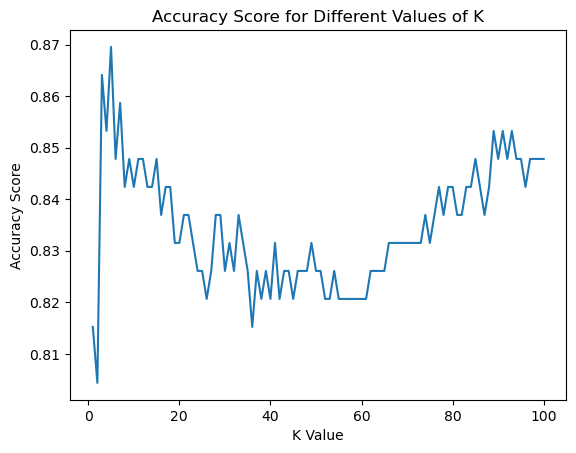

In [62]:
# split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
# train the K-nearest neighbors model on multiple values of K to determine the best 
# value of K for the model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# list potential K values
k_values = list(range(1, 101))

# create a list to store the accuracy scores for each K value
accuracy_scores = []

# loop through each K value and calculate the accuracy score for the model
for k in k_values: 
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# find the K value with the highest accuracy 
best_k = k_values[accuracy_scores.index(max(accuracy_scores))]
print('Best K value:', best_k, 'with accuracy score', max(accuracy_scores))

# plot the accuracy score for each value of K to visualize the best K value
plt.plot(k_values, accuracy_scores)
plt.xlabel('K Value')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Score for Different Values of K')
plt.show()

#Cross Validation


In [63]:
#Check if the classes are balanced
class_count=data['HeartDisease'].value_counts()
lowerlimit=class_count[0]*0.2
upperlimit=class_count[0]*1.2
if lowerlimit <= class_count[0] <= upperlimit: 
    print("Data classes well balanced, use regular K-folds cross validation")

#print the number of samples in each class
print(data['HeartDisease'].value_counts())


Data classes well balanced, use regular K-folds cross validation
HeartDisease
1    508
0    410
Name: count, dtype: int64


In [64]:
#Calculate cross validation scores using K folds and Stratified K Folds
from sklearn.model_selection import cross_val_score, StratifiedKFold
#Use K-folds cross validation with 5 folds and print accuracy scores
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)
scores = cross_val_score(knn, X, y, cv=5)
cv=StratifiedKFold(n_splits=5)
#Use stratified K-folds cross validation with 5 folds to see if balancing classes changes accuracy scores
scores_strat = cross_val_score(knn, X, y, cv=cv)
print(scores)
print(scores_strat)

[0.82608696 0.8423913  0.86413043 0.84153005 0.75409836]
[0.82608696 0.8423913  0.86413043 0.84153005 0.75409836]


/var/folders/cy/798vqkrj1p76h7c4p4q8_85c0000gn/T/ipykernel_25684/2364779386.py:26: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  viridis = cm.get_cmap('viridis')


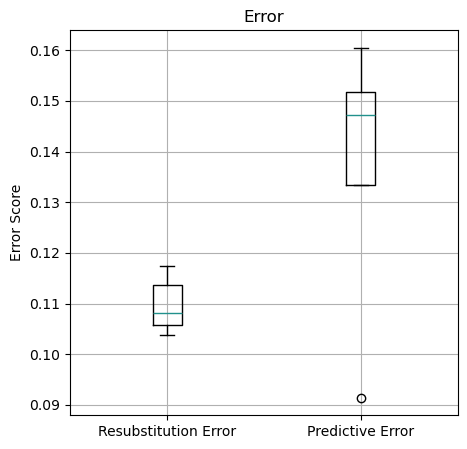

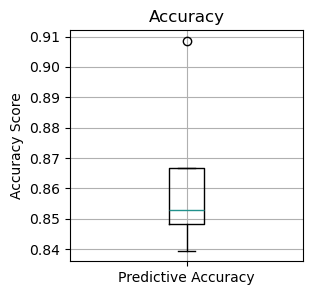

Mean Accuracy = 0.8631762949915938


In [65]:
#Calculate resubsitution and testing error for kfolds in a range of 1-5 folds using KNN with 11 nearest neighbors
#This code manually calculates error and accuracy using K folds cross validation
kfolds=5
np.random.seed(10)
folds = np.random.randint(kfolds,size=X.shape[0])
all_errors_resub=[]
all_errors_predict=[]
all_accuracy_test=[]
for kf in range(kfolds): 
    X_train=X.iloc[folds!=kf]
    y_train=y.iloc[folds!=kf]
    X_test=X.iloc[folds==kf]
    y_test=y.iloc[folds==kf]
    knn.fit(X_train,y_train)
    y_pred_train = knn.predict(X_train)
    y_pred_test = knn.predict(X_test)
    error_resubstitution = (y_pred_train != y_train).mean()
    error_predictive = (y_pred_test != y_test).mean()
    accuracy_test = (y_pred_test == y_test).mean()
    all_errors_resub.append(error_resubstitution)
    all_errors_predict.append(error_predictive)
    all_accuracy_test.append(accuracy_test)
#Plot Errors
import matplotlib.cm as cm
all_errors=[all_errors_resub,all_errors_predict]
viridis = cm.get_cmap('viridis')
plt.figure(figsize=(5, 5))
plt.boxplot(all_errors, labels=['Resubstitution Error','Predictive Error'],
            patch_artist=False,  # Fill with color
            medianprops=dict(color=viridis(0.5)))  # Median line color
plt.title('Error')
plt.ylabel('Error Score')
plt.grid(True)
plt.show()
#Plot accuracy scores averaged over 5 folds
plt.figure(figsize=(3,3))
plt.boxplot(all_accuracy_test, labels=["Predictive Accuracy"], patch_artist=False, medianprops=dict(color=viridis(0.5)))
plt.title('Accuracy')
plt.ylabel('Accuracy Score')
plt.grid(True)
plt.show()
print("Mean Accuracy =", sum(all_accuracy_test)/len(all_accuracy_test))

#Feature Selection

Best Combination of 2 Features: ['Cholesterol', 'ExerciseAngina'] with accuracy score 0.7934782608695652
Best Combination of 3 Features: ['ChestPainType', 'Cholesterol', 'ST_Slope'] with accuracy score 0.8206521739130435
Best Combination of 4 Features: ['Sex', 'Cholesterol', 'ExerciseAngina', 'ST_Slope'] with accuracy score 0.8532608695652174
Best Combination of 5 Features: ['ChestPainType', 'Cholesterol', 'RestingECG', 'MaxHR', 'ST_Slope'] with accuracy score 0.8586956521739131
Best Combination of 6 Features: ['Sex', 'RestingBP', 'Cholesterol', 'ExerciseAngina', 'Oldpeak', 'ST_Slope'] with accuracy score 0.875
Best Combination of 7 Features: ['Sex', 'RestingBP', 'Cholesterol', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope'] with accuracy score 0.8641304347826086
Best Combination of 8 Features: ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'ExerciseAngina', 'ST_Slope'] with accuracy score 0.8695652173913043
Best Combination of 9 Features: ['Age', 'Sex', 'Ch

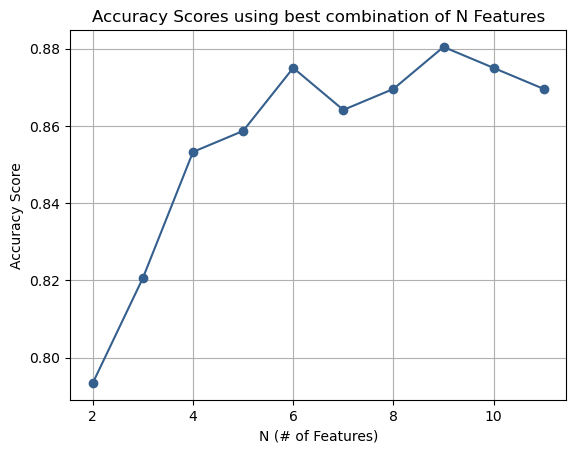

In [66]:
#Iterating through everyone combo of n predictors to see which yields the best classifier
#import combinations
from itertools import combinations
all_accuracy=[]
all_best_fts=[]
for num_features in range(2, X.shape[1]+1):
    accuracy_scores_combo=[]
    features_combo=[]
    predict_combos=list(combinations(range(X.shape[1]),num_features)) #create all possible combos of column numbers
    for combo in predict_combos: 
        X_combo=X.iloc[:,list(combo)]
        X_train_combo, X_test_combo, y_train_combo, y_test_combo = train_test_split(X_combo, y, test_size = 0.2, random_state = 0)
        knn = KNeighborsClassifier(n_neighbors = 5)
        knn.fit(X_train_combo, y_train_combo)
        y_pred_combo = knn.predict(X_test_combo)
        accuracy = accuracy_score(y_test_combo, y_pred_combo)
        accuracy_scores_combo.append(accuracy)
        features=X.columns
        curr_features = [features[i] for i in combo]
        features_combo.append(curr_features)
    features_combo_str = [' & '.join(combo) for combo in features_combo]
    best_features = features_combo[accuracy_scores_combo.index(max(accuracy_scores_combo))]
    print('Best Combination of', num_features, 'Features:' , best_features, 'with accuracy score', max(accuracy_scores_combo))
    all_best_fts.append(best_features)
    all_accuracy.append(max(accuracy_scores_combo))
#Plot accuracy using all features vs 2 best features
num_features_labels=list(range(2, X.shape[1]+1))
plt.title('Accuracy Scores using best combination of N Features')
plt.ylabel('Accuracy Score')
plt.grid(True)
plt.plot(num_features_labels, all_accuracy, marker='o', color=viridis(0.3))
plt.xlabel('N (# of Features)')
plt.show()

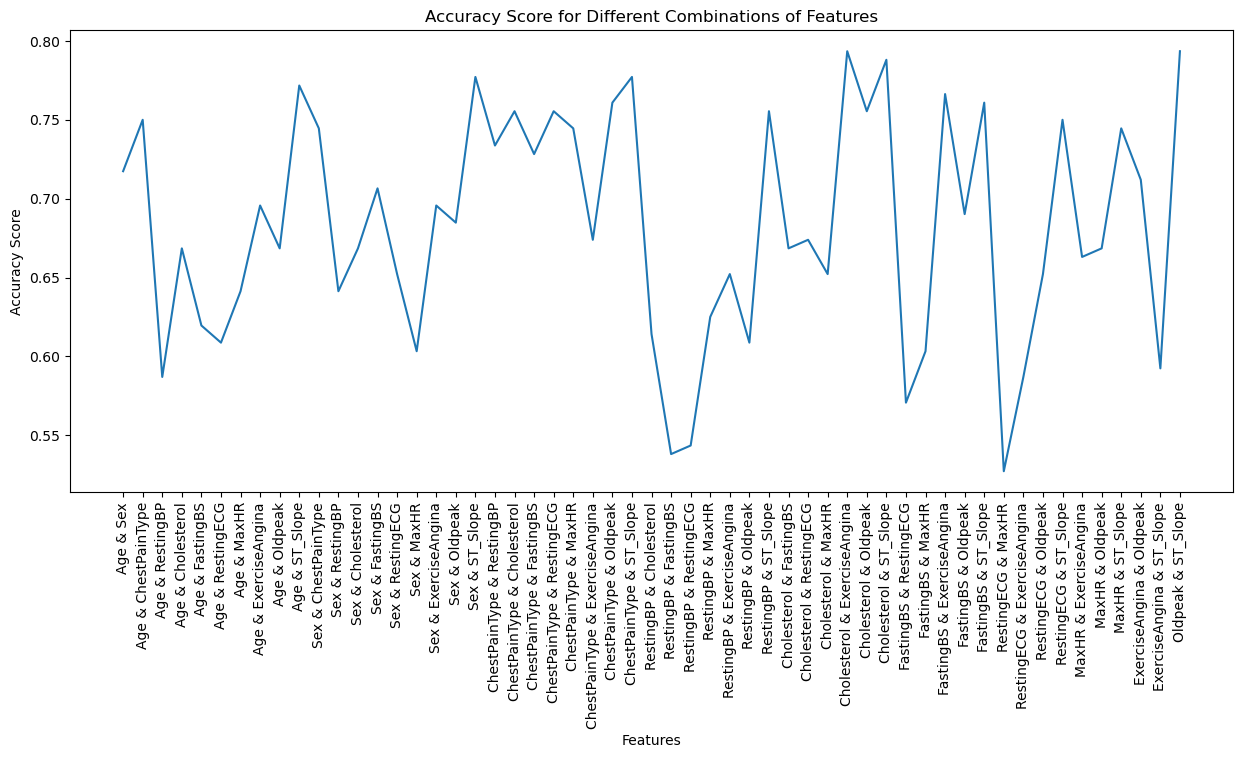

Best Combination of 2 Features: ['Cholesterol', 'ExerciseAngina'] with accuracy score 0.7934782608695652


In [67]:
#Iterating through everyone combo of 2 predictors to see which yields the best classifier
#import combinations
from itertools import combinations
accuracy_scores_combo=[]
features_combo=[]

predict_combos=list(combinations(range(X.shape[1]),2)) #create all possible combos of column numbers
for combo in predict_combos: 
    X_combo=X.iloc[:,list(combo)]
    X_train_combo, X_test_combo, y_train_combo, y_test_combo = train_test_split(X_combo, y, test_size = 0.2, random_state = 0)
    knn = KNeighborsClassifier(n_neighbors = 5)
    knn.fit(X_train_combo, y_train_combo)
    y_pred_combo = knn.predict(X_test_combo)
    accuracy = accuracy_score(y_test_combo, y_pred_combo)
    accuracy_scores_combo.append(accuracy)
    features=X.columns
    curr_features = [features[i] for i in combo]
    features_combo.append(curr_features)
features_combo_str = [' & '.join(combo) for combo in features_combo]
# plot the accuracy score for each threshold value
plt.figure(figsize=(15,6))
plt.plot(features_combo_str, accuracy_scores_combo)
plt.xlabel('Features') #too many combos to fit all labels
plt.xticks(rotation=90)
plt.ylabel('Accuracy Score')
plt.title('Accuracy Score for Different Combinations of Features')
plt.show()
best_features = features_combo[accuracy_scores_combo.index(max(accuracy_scores_combo))]
print('Best Combination of 2 Features:', best_features, 'with accuracy score', max(accuracy_scores_combo))

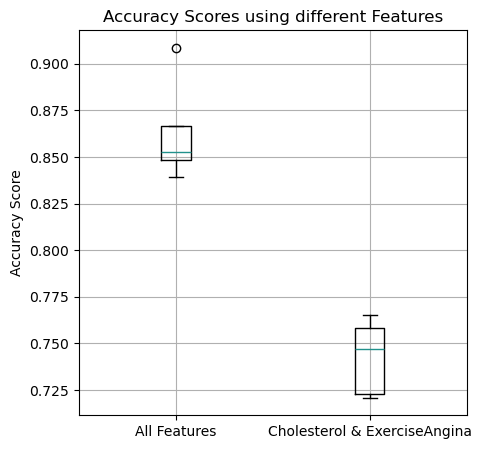

In [68]:
#plotting accuracy using all features versus best two features
#Using 5 folds 
from scipy.stats import ttest_ind
from matplotlib.cm import viridis
#ttest=ttest_ind()
kfolds=5
np.random.seed(10)
folds = np.random.randint(kfolds,size=X.shape[0])
best_combo=predict_combos[accuracy_scores_combo.index(max(accuracy_scores_combo))]
best_combo_name=features_combo_str[accuracy_scores_combo.index(max(accuracy_scores_combo))]
all_ft_accuracy=[]
best_ft_accuracy=[]
for kf in range(kfolds): 
    X_train=X.iloc[folds!=kf]
    y_train=y.iloc[folds!=kf]
    X_test=X.iloc[folds==kf]
    y_test=y.iloc[folds==kf]
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    all_ft_accuracy.append(accuracy)
    X_combo=X.iloc[:,list(best_combo)]
    X_train_combo=X_combo.iloc[folds!=kf]
    y_train_combo=y.iloc[folds!=kf]
    X_test_combo=X_combo.iloc[folds==kf]
    y_test_combo=y.iloc[folds==kf]
    knn.fit(X_train_combo, y_train_combo)
    y_pred_combo = knn.predict(X_test_combo)
    accuracy_combo = accuracy_score(y_test_combo, y_pred_combo)
    best_ft_accuracy.append(accuracy_combo)
all_accuracy=[all_ft_accuracy,best_ft_accuracy]
#Plot accuracy using all features vs 2 best features
plt.figure(figsize=(5, 5))
plt.boxplot(all_accuracy, labels=['All Features',best_combo_name],
            patch_artist=False,  # Fill with color
            medianprops=dict(color=viridis(0.5)))  # Median line color
plt.title('Accuracy Scores using different Features')
plt.ylabel('Accuracy Score')
plt.grid(True)
plt.show()

best combination of 9 features: Age & Sex & ChestPainType & RestingBP & Cholesterol & FastingBS & RestingECG & ExerciseAngina & ST_Slope


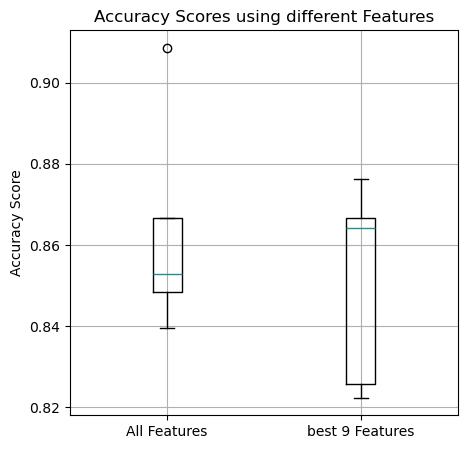

In [70]:
#Plotting Accuracy for best 9 features
predict_combos=list(combinations(range(X.shape[1]),9)) #create all possible combos of column numbers
accuracy_scores_9ft=[]
features_combo_9ft=[]
for combo in predict_combos: 
    X_combo=X.iloc[:,list(combo)]
    X_train_combo, X_test_combo, y_train_combo, y_test_combo = train_test_split(X_combo, y, test_size = 0.2, random_state = 0)
    knn = KNeighborsClassifier(n_neighbors = 5)
    knn.fit(X_train_combo, y_train_combo)
    y_pred_combo = knn.predict(X_test_combo)
    accuracy = accuracy_score(y_test_combo, y_pred_combo)
    accuracy_scores_9ft.append(accuracy)
    features=X.columns
    curr_features = [features[i] for i in combo]
    features_combo_9ft.append(curr_features)
features_combo_str = [' & '.join(combo) for combo in features_combo_9ft]
best_combo_9ft=predict_combos[accuracy_scores_9ft.index(max(accuracy_scores_9ft))]
best_combo_name_9ft=features_combo_str[accuracy_scores_9ft.index(max(accuracy_scores_9ft))]
print("best combination of 9 features:", best_combo_name_9ft)
#Run KNN with 5 fold cross validation using best 9 features
kfolds=5
np.random.seed(10)
folds = np.random.randint(kfolds,size=X.shape[0])
best_ft_accuracy_9ft=[]
for kf in range(kfolds): 
    X_combo=X.iloc[:,list(best_combo_9ft)]
    X_train_combo=X_combo.iloc[folds!=kf]
    y_train_combo=y.iloc[folds!=kf]
    X_test_combo=X_combo.iloc[folds==kf]
    y_test_combo=y.iloc[folds==kf]
    knn.fit(X_train_combo, y_train_combo)
    y_pred_combo = knn.predict(X_test_combo)
    accuracy_combo = accuracy_score(y_test_combo, y_pred_combo)
    best_ft_accuracy_9ft.append(accuracy_combo)
all_accuracy=[all_ft_accuracy,best_ft_accuracy_9ft]
plt.figure(figsize=(5, 5))
plt.boxplot(all_accuracy, labels=['All Features','best 9 Features'],
            patch_artist=False,  # Fill with color
            medianprops=dict(color=viridis(0.5)))  # Median line color
plt.title('Accuracy Scores using different Features')
plt.ylabel('Accuracy Score')
plt.grid(True)
plt.show()


PCA

NUMBER OF PRINCIPAL COMPONENTS: 9


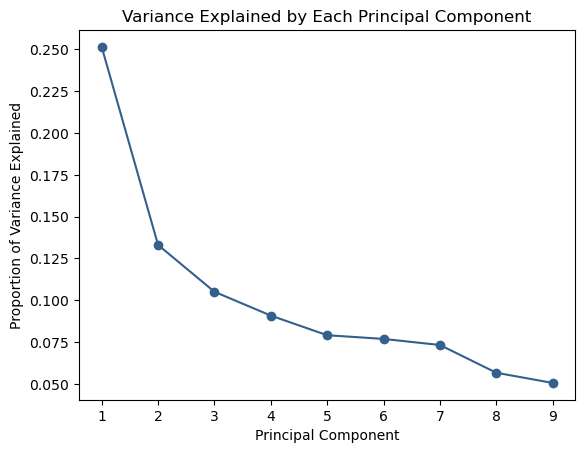

[0.25139665 0.1330889  0.10512913 0.09088956 0.07916761 0.07695206
 0.07333057 0.05675535 0.05066628]


In [71]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.9)   #initialize PCA to explain 90% of variance
pca.fit(X) #fit the PCA object to the data
num_pc = pca.n_components_ #get the number of principal components
coef = pca.components_ #get the principal components
print(f"NUMBER OF PRINCIPAL COMPONENTS: {num_pc}")

#Scree plot
explained_variance = pca.explained_variance_ratio_
plt.figure()
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', color=viridis(0.3))
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.title('Variance Explained by Each Principal Component')
plt.show()
print(explained_variance)

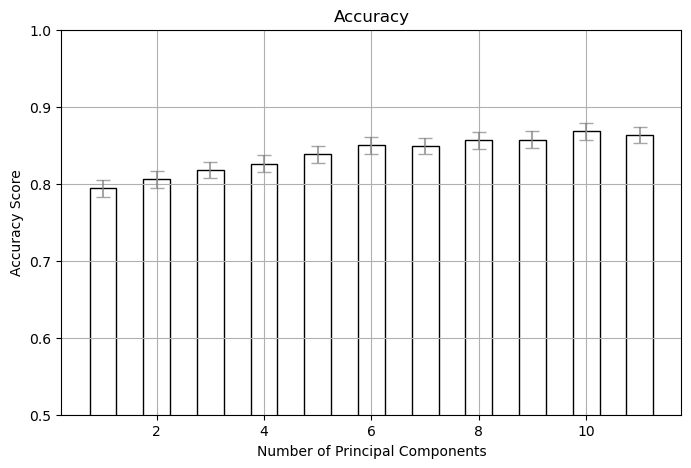

Accuracy of 0.8500045376116491 w/ 6 PCs


In [72]:
#Train KNN classifier using increasing number of PCs w/ 5 fold cross validation to determine ideal # of PCs to use
all_standard_errors_PCs=[]
all_accuracy_test_PCs=[]
for num_pcs in range(1, X.shape[1]+1):
    all_errors_resub_PC=[]
    all_errors_predict_PC=[]
    all_accuracy_test_PC=[]
    standard_error=[]
    pca = PCA(n_components=num_pcs)   #initialize PCA 
    kfolds=5
    np.random.seed(10)
    folds = np.random.randint(kfolds,size=X.shape[0])

    for kf in range(kfolds): 
        X_train=X.iloc[folds!=kf]
        y_train=y.iloc[folds!=kf]
        X_test=X.iloc[folds==kf]
        y_test=y.iloc[folds==kf]
        # Fit PCA on training data
        pca.fit(X_train)
        X_train_pca = pca.transform(X_train)
        X_test_pca = pca.transform(X_test)
        # Train the classifier on the PCA-transformed training data
        knn.fit(X_train_pca, y_train)
        # Predict on training and test data
        y_pred_train = knn.predict(X_train_pca)
        y_pred_test = knn.predict(X_test_pca)
        error_resubstitution = (y_pred_train != y_train).mean()
        error_predictive = (y_pred_test != y_test).mean()
        accuracy_test = (y_pred_test == y_test).mean()
        all_errors_resub_PC.append(error_resubstitution)
        all_errors_predict_PC.append(error_predictive)
        all_accuracy_test_PC.append(accuracy_test)
    standard_error = [np.std(all_accuracy_test_PC) / np.sqrt(len(all_accuracy_test_PC))]
    all_standard_errors_PCs.append(standard_error)
    all_accuracy_test_PC=sum(all_accuracy_test_PC)/len(all_accuracy_test_PC)
    all_accuracy_test_PCs.append(all_accuracy_test_PC)
#Plot Accuracy Scores by PC
num_pcs_to_plot=list(range(1, X.shape[1]+1))
plt.figure(figsize=(8, 5))
ax = plt.gca()
ax.bar(num_pcs_to_plot, all_accuracy_test_PCs,width=0.5, color=(0,0,0,0), edgecolor="black")
ax.errorbar(num_pcs_to_plot, all_accuracy_test_PCs, yerr=standard_error, fmt='none',alpha=0.7, color='gray', capsize=5, label='')
ax.set_ylim(0.5,1)
plt.title('Accuracy')
plt.ylabel('Accuracy Score')
plt.xlabel('Number of Principal Components')
plt.grid(True)
plt.show()
print ("Accuracy of", all_accuracy_test_PCs[5], "w/ 6 PCs")

/var/folders/cy/798vqkrj1p76h7c4p4q8_85c0000gn/T/ipykernel_25684/2630050719.py:30: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  viridis = cm.get_cmap('viridis')


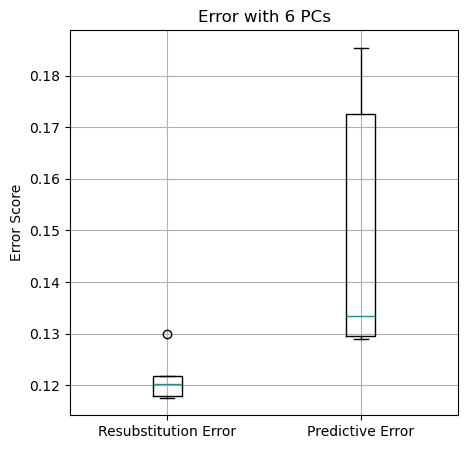

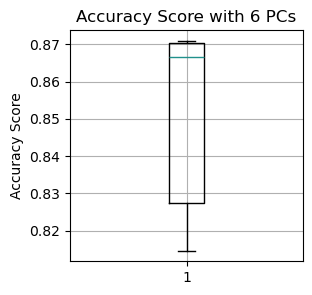

In [74]:
#Plot Resubstitution, Predictive Error, Accuracy for 6 PCs 
from sklearn.decomposition import PCA
pca = PCA(n_components=6)   #initialize PCA with 6 PCs
all_errors_resub_6PC=[]
all_errors_predict_6PC=[]
all_accuracy_test_6PC=[]
for kf in range(kfolds): 
    X_train=X.iloc[folds!=kf]
    y_train=y.iloc[folds!=kf]
    X_test=X.iloc[folds==kf]
    y_test=y.iloc[folds==kf]
    # Fit PCA on training data
    pca.fit(X_train)
    X_train_pca = pca.transform(X_train)
    X_test_pca = pca.transform(X_test)
    # Train the classifier on the PCA-transformed training data
    knn.fit(X_train_pca, y_train)
    # Predict on training and test data
    y_pred_train = knn.predict(X_train_pca)
    y_pred_test = knn.predict(X_test_pca)
    error_resubstitution = (y_pred_train != y_train).mean()
    error_predictive = (y_pred_test != y_test).mean()
    accuracy_test = (y_pred_test == y_test).mean()
    all_errors_resub_6PC.append(error_resubstitution)
    all_errors_predict_6PC.append(error_predictive)
    all_accuracy_test_6PC.append(accuracy_test)
#Plot Errors
import matplotlib.cm as cm
all_errors=[all_errors_resub_6PC,all_errors_predict_6PC]
viridis = cm.get_cmap('viridis')
plt.figure(figsize=(5, 5))
plt.boxplot(all_errors, labels=['Resubstitution Error','Predictive Error'],
            patch_artist=False,  # Fill with color
            medianprops=dict(color=viridis(0.5)))  # Median line color
plt.title('Error with 6 PCs')
plt.ylabel('Error Score')
plt.grid(True)
plt.show()
plt.figure(figsize=(3,3))
plt.boxplot(all_accuracy_test_6PC, patch_artist=False, medianprops=dict(color=viridis(0.5)))
plt.title('Accuracy Score with 6 PCs')
plt.ylabel('Accuracy Score')
plt.grid(True)
plt.show()

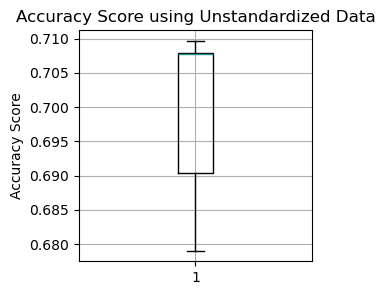

In [75]:
#Train KNN with unstandardized data for comparison
unstandard_accuracy=[]
for kf in range(kfolds): 
    X_train=X_raw.iloc[folds!=kf]
    y_train=y.iloc[folds!=kf]
    X_test=X_raw.iloc[folds==kf]
    y_test=y.iloc[folds==kf]
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    unstandard_accuracy.append(accuracy)
plt.figure(figsize=(3,3))
plt.boxplot(unstandard_accuracy, patch_artist=False, medianprops=dict(color=viridis(0.5)))
plt.title('Accuracy Score using Unstandardized Data')
plt.ylabel('Accuracy Score')
plt.grid(True)
plt.show()

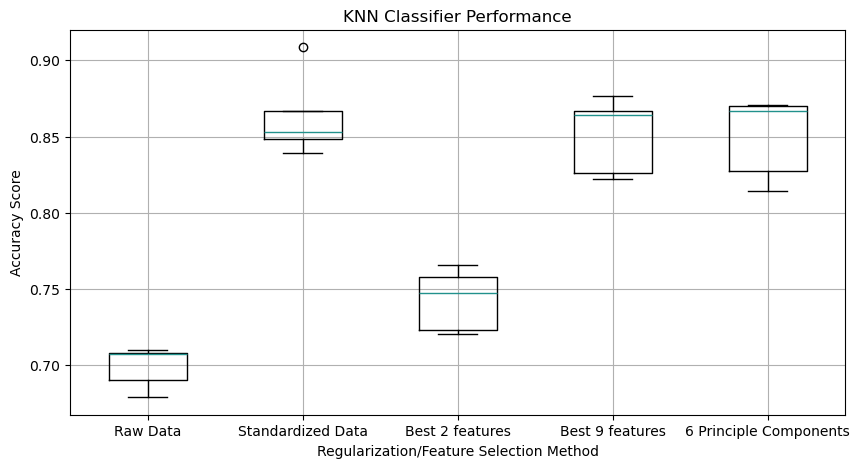

In [83]:
#Plot accuracies to compare performance of KNN (k=5 neighbors) with 5-fold cross validation using different datasets and feature selection methods
all_accuracies=[unstandard_accuracy,all_ft_accuracy,best_ft_accuracy,best_ft_accuracy_9ft,all_accuracy_test_6PC]
plt.figure(figsize=(10,5))
plt.boxplot(all_accuracies, labels=['Raw Data','Standardized Data', "Best 2 features","Best 9 features", "6 Principle Components"], patch_artist=False, medianprops=dict(color=viridis(0.5)))
plt.title('KNN Classifier Performance')
plt.ylabel('Accuracy Score')
plt.xlabel('Regularization/Feature Selection Method')
plt.grid(True)
plt.show()